In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

## Data

In [25]:
raw_df = pd.read_csv('./spambase.data', names=list(range(58)))

In [26]:
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [27]:
ys = raw_df[57]
xs = raw_df.drop(57, axis=1)

x_train, x_test, y_train, y_test = train_test_split(xs, ys, test_size=0.25, random_state = 2001)

## Q1 Decision Trees

In [28]:
from sklearn.tree import DecisionTreeClassifier as DTC 

In [32]:
dtc = DTC(criterion='entropy')
dtc.fit(x_train, y_train)

# Training metrics
y_train_hat = dtc.predict(x_train)
train_acc = accuracy_score(y_train, y_train_hat)
train_err = 1 - train_acc
train_f1 = f1_score(y_train, y_train_hat)
train_auc = roc_auc_score(y_train, dtc.predict_proba(x_train)[:, 1])

# Testing metrics
y_test_hat = dtc.predict(x_test)
test_acc = accuracy_score(y_test, y_test_hat)
test_err = 1 - test_acc
test_f1 = f1_score(y_test, y_test_hat)
test_auc = roc_auc_score(y_test, dtc.predict_proba(x_test)[:, 1])

template = "Model: {} \t Accuracy: {:.4f} \t Error: {:.4f} \t F1: {:.4f} \t AUC: {:.4f}" 

print(template.format("Training - Ent", train_acc, train_err, train_f1, train_auc))
print(template.format("Testing  - Ent", test_acc, test_err, test_f1, test_auc))

Model: Training - Ent 	 Accuracy: 0.9994 	 Error: 0.0006 	 F1: 0.9993 	 AUC: 1.0000
Model: Testing  - Ent 	 Accuracy: 0.9418 	 Error: 0.0582 	 F1: 0.9269 	 AUC: 0.9426


In [30]:
dtc_gini = DTC()
dtc_gini.fit(x_train, y_train)

# Training metrics
y_train_hat = dtc_gini.predict(x_train)
train_acc = accuracy_score(y_train, y_train_hat)
train_err = 1 - train_acc
train_f1 = f1_score(y_train, y_train_hat)
train_auc = roc_auc_score(y_train, dtc.predict_proba(x_train)[:, 1])

# Testing metrics
y_test_hat = dtc_gini.predict(x_test)
test_acc = accuracy_score(y_test, y_test_hat)
test_err = 1 - test_acc
test_f1 = f1_score(y_test, y_test_hat)
test_auc = roc_auc_score(y_test, dtc.predict_proba(x_test)[:, 1])


template = "Model: {} \t Accuracy: {:.4f} \t Error: {:.4f} \t F1: {:.4f} \t AUC: {:.4f}" 

print(template.format("Training - Gini", train_acc, train_err, train_f1, train_auc))
print(template.format("Testing  - Gini", test_acc, test_err, test_f1, test_auc))

Model: Training - Gini 	 Accuracy: 0.9994 	 Error: 0.0006 	 F1: 0.9993 	 AUC: 1.0000
Model: Testing  - Gini 	 Accuracy: 0.9209 	 Error: 0.0791 	 F1: 0.9003 	 AUC: 0.9487


In [39]:
# Using our entropy-trained dtc for max depth
train_accs = []
test_accs = []
max = dtc.get_depth()

for max_depth in range(1, max):
    clf = DTC(criterion='entropy', max_depth=max_depth)
    clf.fit(x_train, y_train)

    y_train_hat = clf.predict(x_train)
    y_hat = clf.predict(x_test)

    train_accs.append(accuracy_score(y_train, y_train_hat))
    test_accs.append(accuracy_score(y_test, y_hat))






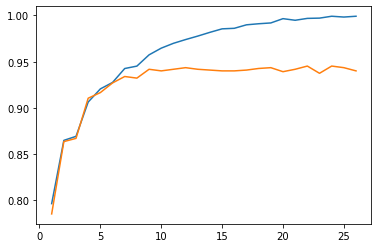

In [40]:
plt.plot(range(1, max), train_accs)
plt.plot(range(1, max), test_accs)

## Q2 Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier as RFC 

In [188]:
Ts = [10, 50, 100, 500]

trainings = []
testings = []


for T in Ts:

    rfc = RFC(n_estimators=T)
    rfc.fit(x_train, y_train)

    # Training metrics
    y_train_hat = rfc.predict(x_train)
    train_acc = accuracy_score(y_train, y_train_hat)
    train_err = 1 - train_acc
    train_f1 = f1_score(y_train, y_train_hat)
    train_auc = roc_auc_score(y_train, rfc.predict_proba(x_train)[:, 1])

    # Testing metrics
    y_test_hat = rfc.predict(x_test)
    test_acc = accuracy_score(y_test, y_test_hat)
    test_err = 1 - test_acc
    test_f1 = f1_score(y_test, y_test_hat)
    test_auc = roc_auc_score(y_test, rfc.predict_proba(x_test)[:, 1])

    template = "Model: {} \t Accuracy: {:.8f} \t Error: {:.8f} \t F1: {:.8f} \t AUC: {:.8f}" 

    trainings.append(template.format(f"Training - {T}", train_acc, train_err, train_f1, train_auc))
    testings.append(template.format(f"Testing  - {T}", test_acc, test_err, test_f1, test_auc))

for p in trainings:
    print(p)

print('\n')
for p in testings:
    print(p)

Model: Training - 10 	 Accuracy: 0.99594203 	 Error: 0.00405797 	 F1: 0.99484536 	 AUC: 0.99997997
Model: Training - 50 	 Accuracy: 0.99942029 	 Error: 0.00057971 	 F1: 0.99926686 	 AUC: 0.99999754
Model: Training - 100 	 Accuracy: 0.99942029 	 Error: 0.00057971 	 F1: 0.99926632 	 AUC: 0.99999930
Model: Training - 500 	 Accuracy: 0.99942029 	 Error: 0.00057971 	 F1: 0.99926686 	 AUC: 0.99999930


Model: Testing  - 10 	 Accuracy: 0.94439618 	 Error: 0.05560382 	 F1: 0.92792793 	 AUC: 0.98315186
Model: Testing  - 50 	 Accuracy: 0.95308427 	 Error: 0.04691573 	 F1: 0.93891403 	 AUC: 0.98961922
Model: Testing  - 100 	 Accuracy: 0.95742832 	 Error: 0.04257168 	 F1: 0.94438138 	 AUC: 0.99162590
Model: Testing  - 500 	 Accuracy: 0.95482189 	 Error: 0.04517811 	 F1: 0.94090909 	 AUC: 0.99154658


<AxesSubplot:>

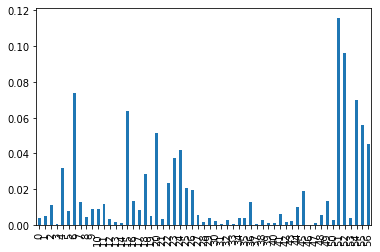

In [48]:
rfc_50 = RFC(n_estimators=50)
rfc.fit(x_train, y_train)
pd.Series(rfc.feature_importances_).plot.bar()


## Q3 Adaboost

In [49]:
from sklearn.ensemble import AdaBoostClassifier as ADC 

In [187]:
Cs = [10, 50, 100, 500]

trainings = []
testings = []

for C in Cs:
    adc = ADC(base_estimator=DTC(), n_estimators=C)
    adc.fit(x_train, y_train)

    # Training metrics
    y_train_hat = adc.predict(x_train)
    train_acc = accuracy_score(y_train, y_train_hat)
    train_err = 1 - train_acc
    train_f1 = f1_score(y_train, y_train_hat)
    train_auc = roc_auc_score(y_train, adc.predict_proba(x_train)[:, 1])

    # Testing metrics
    y_test_hat = adc.predict(x_test)
    test_acc = accuracy_score(y_test, y_test_hat)
    test_err = 1 - test_acc
    test_f1 = f1_score(y_test, y_test_hat)
    test_auc = roc_auc_score(y_test, adc.predict_proba(x_test)[:, 1])

    template = "Model: {} \t Accuracy: {:.4f} \t Error: {:.4f} \t F1: {:.4f} \t AUC: {:.4f}" 

    trainings.append(template.format(f"Training - {C}", train_acc, train_err, train_f1, train_auc))
    testings.append(template.format(f"Testing  - {C}", test_acc, test_err, test_f1, test_auc))

for p in trainings:
    print(p)

print('\n')
for p in testings:
    print(p)

    

Model: Training - 10 	 Accuracy: 0.9994 	 Error: 0.0006 	 F1: 0.9993 	 AUC: 1.0000
Model: Training - 50 	 Accuracy: 0.9994 	 Error: 0.0006 	 F1: 0.9993 	 AUC: 1.0000
Model: Training - 100 	 Accuracy: 0.9994 	 Error: 0.0006 	 F1: 0.9993 	 AUC: 1.0000
Model: Training - 500 	 Accuracy: 0.9994 	 Error: 0.0006 	 F1: 0.9993 	 AUC: 1.0000


Model: Testing  - 10 	 Accuracy: 0.9427 	 Error: 0.0573 	 F1: 0.9255 	 AUC: 0.9734
Model: Testing  - 50 	 Accuracy: 0.9496 	 Error: 0.0504 	 F1: 0.9345 	 AUC: 0.9861
Model: Testing  - 100 	 Accuracy: 0.9522 	 Error: 0.0478 	 F1: 0.9373 	 AUC: 0.9802
Model: Testing  - 500 	 Accuracy: 0.9548 	 Error: 0.0452 	 F1: 0.9413 	 AUC: 0.9881


In [53]:
from sklearn.metrics import roc_curve

Model: Training - Ada 	 Accuracy: 0.9994 	 Error: 0.0006 	 F1: 0.9993 	 AUC: 1.0000
Model: Training - Ran 	 Accuracy: 0.9994 	 Error: 0.0006 	 F1: 0.9993 	 AUC: 1.0000
Model: Training - Dec 	 Accuracy: 0.9994 	 Error: 0.0006 	 F1: 0.9993 	 AUC: 1.0000


Model: Testing  - Ada 	 Accuracy: 0.9557 	 Error: 0.0443 	 F1: 0.9425 	 AUC: 0.9890
Model: Testing  - Ran 	 Accuracy: 0.9531 	 Error: 0.0469 	 F1: 0.9388 	 AUC: 0.9913
Model: Testing  - Dec 	 Accuracy: 0.9175 	 Error: 0.0825 	 F1: 0.8953 	 AUC: 0.9161


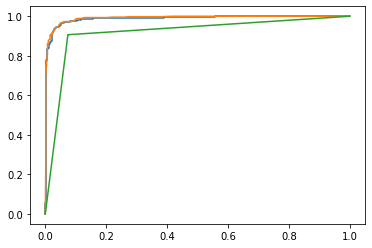

In [193]:
thresholds = [x / 10 for x in range(11)]

trainings = []
testings = []

adc = ADC(base_estimator=DTC(), n_estimators=100)
adc.fit(x_train, y_train)
fpr, tpr, _ = roc_curve(y_test, adc.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr)

rfc = RFC(n_estimators=100)
rfc.fit(x_train, y_train)
fpr, tpr, _ = roc_curve(y_test, rfc.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr)

dtc = DTC()
dtc.fit(x_train, y_train)
fpr, tpr, _ = roc_curve(y_test, dtc.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr)

for model in [adc, rfc, dtc]:
    y_test_hat = model.predict(x_test)
    test_acc = accuracy_score(y_test, y_test_hat)
    test_err = 1 - test_acc
    test_f1 = f1_score(y_test, y_test_hat)
    test_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

    template = "Model: {} \t Accuracy: {:.4f} \t Error: {:.4f} \t F1: {:.4f} \t AUC: {:.4f}" 

    trainings.append(template.format(f"Training - {model.__repr__()[:3]}", train_acc, train_err, train_f1, train_auc))
    testings.append(template.format(f"Testing  - {model.__repr__()[:3]}", test_acc, test_err, test_f1, test_auc))


for p in trainings:
    print(p)

print('\n')
for p in testings:
    print(p)

## Question 4 Naive Bayes

In [64]:
import numpy as np

In [93]:
mush_raw = pd.read_csv('./agaricus-lepiota.data', names=list(range(23)))

ys = mush_raw[0]
xs = mush_raw.drop(0, axis=1)

x_train_mush, x_test_mush, y_train_mush, y_test_mush = train_test_split(xs, ys, test_size=0.25, random_state = 2001)

x_train_mush.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
480,b,y,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,k,s,m
2172,f,f,g,t,n,f,c,b,n,t,...,s,g,g,p,w,o,p,n,v,d
7867,x,s,g,f,n,f,w,b,g,e,...,s,w,w,p,w,t,p,w,s,g
5050,x,y,g,f,f,f,c,b,p,e,...,k,b,b,p,w,o,l,h,v,d
4636,x,y,y,f,f,f,c,b,p,e,...,k,p,b,p,w,o,l,h,v,p


In [166]:
priors = {'p': {x: {} for x in range(1, 23)}, 'e': {x: {} for x in range(1, 23)}}

# go through each column and make an entry in the prior for each unique value
# start with 1 for laplace smoothing

for col in x_train_mush.columns:
    priors['p'][col] = {entry: 1 for entry in x_train_mush[col].unique()}
    priors['e'][col] = {entry: 1 for entry in x_train_mush[col].unique()}


for idx, data in x_train_mush.iterrows():
    access = priors[y_train_mush[idx]]

    for col in range(1, 23):
        entry = data[col]
        access[col][entry] += 1

counts = y_train_mush.value_counts()

for label, data in priors.items():
    for idx, feature in data.items():
        for entry, count in feature.items():
            # add no. of unique entries in the feature to finish laplace smoothing
            # divide to turn into true prior
            feature[entry] = count / (y_train_mush.value_counts()[label] + len(feature))


def predict_NB(x):
    score_p = counts['p'] / len(x_train_mush) # start with this value to calculate P(y=y_i)P(x=x_i | y=y_i)

    for col in range(1, 23):
        entry = x[1][col]
        prior = priors['p'][col][entry]
        score_p *= prior


    score_e = counts['e'] / len(x_train_mush)
    for col in range(1, 23):
        entry = x[1][col]
        prior = priors['e'][col][entry]
        score_e *= prior 

    if score_p > score_e:
        return 1
    return 0 



In [169]:
from sklearn.metrics import precision_score, recall_score

In [194]:
converter = {'e': 0, 'p': 1}

y_test_hat_mush = [converter[predict_NB(x)] for x in x_test_mush.iterrows()]

y_test_mush_eval = y_test_mush.replace(converter)

# Testing metrics
acc = accuracy_score(y_test_mush_eval, y_test_hat_mush)
err = 1 - acc
prec = precision_score(y_test_mush_eval, y_test_hat_mush)
rec = recall_score(y_test_mush_eval, y_test_hat_mush)

template = "Model: {} \t Accuracy: {:.8f} \t Error: {:.8f} \t Precision: {:.8f} \t Recall: {:.8f}" 

print(template.format("Testing", acc, err, prec, rec))



Model: Testing 	 Accuracy: 0.94977843 	 Error: 0.05022157 	 Precision: 0.99132321 	 Recall: 0.90674603


In [195]:
from sklearn.naive_bayes import CategoricalNB as CNB 
from sklearn.preprocessing import LabelEncoder

converter = {'e': 0, 'p': 1}

x_train_enc = pd.DataFrame()
x_test_enc = pd.DataFrame()

for col in x_train_mush.columns:
    le = LabelEncoder()
    x_train_enc[col] = le.fit_transform(x_train_mush[col])
    x_test_enc[col] = le.transform(x_test_mush[col])

y_train_enc = y_train_mush.replace(converter)
y_test_enc = y_test_mush.replace(converter)


cnb = CNB()
cnb.fit(x_train_enc, y_train_enc)

y_test_hat_mush_package = cnb.predict(x_test_enc)

# Testing metrics
acc = accuracy_score(y_test_enc, y_test_hat_mush_package)
err = 1 - acc
prec = precision_score(y_test_enc, y_test_hat_mush_package)
rec = recall_score(y_test_enc, y_test_hat_mush_package)

template = "Model: {} \t Accuracy: {:.8f} \t Error: {:.8f} \t Precision: {:.8f} \t Recall: {:.8f}" 

print(template.format("Testing", acc, err, prec, rec))

Model: Testing 	 Accuracy: 0.94977843 	 Error: 0.05022157 	 Precision: 0.99132321 	 Recall: 0.90674603


array([2, 5, 3, ..., 4, 5, 2])